In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import warnings

# Set the default font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

# Parameters

In [1]:
# The filtering based on hotspots.
# filter_version = 'including'  # 'including', 'excluding', 'only'
list_filter_versions = ['including', 'excluding', 'only']

INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }#[filter_version]

FREQS_PREFIX = {
        'including':'tables/freqs.denovo_indels.', 
        'excluding':'tables/freqs.exclHotspots.', 
        'only':'tables/freqs.onlyHotspots.' 
    }#[filter_version]


# The 3 species.
list_species = ['mouse','macaque','human']
# The alignment chosen.
alignment = 'chrM'

# Import indels for 3 species and split by mutation type

In [2]:
def get_indels(filter_version):
    # Combine indels for the three species.
    INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }
    list_df = []
    for species in list_species:
        df = pd.read_table( f'{INDEL_PREFIX[filter_version]}{alignment}_{species}.tab' )
        list_df.append( df )
    df_indels = pd.concat(list_df)

    # Classify as Insertion or Deletion.
    df_indels['Mutation_type'] = np.where(
        df_indels['REF'].str.len() > df_indels['ALT'].str.len(), 'Deletion',
        np.where(df_indels['REF'].str.len() < df_indels['ALT'].str.len(), 'Insertion', 'Other')
    )

    # Indel length.
    df_indels['Change_in_length'] = df_indels['ALT'].str.len() - df_indels['REF'].str.len()

    return df_indels



df_indels = get_indels('including')
df_indels

,CHROM,POS,REF,ALT,INFO,SRR_ID,value,Species,AC,AF,...,relin_POS,Tissue_type,Classification,Mutation_ID,Pedigree_shared,Filter_ID,Region,Region_size,Mutation_type,Change_in_length
0,chrM,12343,AT,A,SB=2.42169;AF=0.00495049;AC=0,SRR10068699,.:1:0.00495049:2.42169,mouse,1.0,0.004950,...,NaN,germline,Germline de novo,12343_AT_A,Unique to Individual,G133p4_12343,non-D-loop,15423,Deletion,-1
1,chrM,13053,T,TC,SB=2.11058;AF=0.00329761;AC=0,SRR10068701,.:2:0.00115607:2.64192,mouse,2.0,0.001156,...,NaN,germline,Germline de novo,13053_T_TC,Between pedigrees,G133p4_13053,non-D-loop,15423,Insertion,1
2,chrM,14806,CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAATCATAT...,C,SB=2.57858;AF=0.000629327;AC=0,SRR10068701,.:1:0.000629327:2.57858,mouse,1.0,0.000629,...,NaN,germline,Germline de novo,14806_CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAA...,Unique to Individual,G133p4_14806,non-D-loop,15423,Deletion,-58
3,chrM,14640,A,AG,SB=1.61939;AF=0.00191388;AC=0,SRR10068702,.:2:0.00191388:1.61939,mouse,2.0,0.001914,...,NaN,somatic,Somatic de novo,14640_A_AG,Unique to Individual,G133p4_14640,non-D-loop,15423,Insertion,1
4,chrM,5171,G,GA,SB=2.50905;AF=0.00293255;AC=0,SRR10068703,.:2:0.0034904:3.49031,mouse,2.0,0.003490,...,NaN,somatic,Somatic de novo,5171_G_GA,Between pedigrees,G133p4_5171,non-D-loop,15423,Insertion,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,chrM,864,A,AATGTT,SB=2.38069;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38069,human,1.0,0.000582,...,9034.0,germline,Germline de novo,864_A_AATGTT,NaN,hs006_864,non-D-loop,15447,Insertion,5
179,chrM,865,ACCCC,A,SB=2.38183;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38183,human,1.0,0.000582,...,9035.0,germline,Germline de novo,865_ACCCC_A,NaN,hs006_865,non-D-loop,15447,Deletion,-4
180,chrM,954,A,AAT,SB=1.92242;AF=0.00256082;AC=0,hs010_Oo6,.:2:0.00256082:1.92242,human,2.0,0.002561,...,9124.0,germline,Germline de novo,954_A_AAT,NaN,hs010_954,non-D-loop,15447,Insertion,2
181,chrM,960,TCCC,T,SB=1.79519;AF=0.00258065;AC=0,hs010_Oo6,.:2:0.00258065:1.79519,human,2.0,0.002581,...,9130.0,germline,Germline de novo,960_TCCC_T,NaN,hs010_960,non-D-loop,15447,Deletion,-3


# Import annotations and seq depths

In [3]:
def get_annots():
    annots = pd.read_table(f"tables/annotations.seqDepth.{alignment}.txt")
    return annots

annots = get_annots()
annots


,SRR_ID,Sample_ID,Individual,Tissue,Tissue_alt,Species,Age_group,Age,MeanReadDepth,Nucleotides
0,SRR10068699,G133p4_Oo2,G133p4,Oo,Oo2,mouse,Younger,0.083333,143.790061,2343778
1,SRR10068701,G133p4_Oo,G133p4,Oo,Oo,mouse,Younger,0.083333,1627.007669,26520225
2,SRR10068702,G133p4_M,G133p4,M,M,mouse,Younger,0.083333,1146.431288,18686830
3,SRR10068703,G133p4_Br,G133p4,Br,Br,mouse,Younger,0.083333,698.298712,11382269
4,SRR10068705,G133p3_Oo3,G133p3,Oo,Oo3,mouse,Younger,0.083333,116.046564,1891559
...,...,...,...,...,...,...,...,...,...,...
489,hs023_Oo1,hs023_Oo1,hs023,Oo,Oo1,human,Intermediate,33.000000,1959.128734,32460804
490,hs023_Oo2,hs023_Oo2,hs023,Oo,Oo2,human,Intermediate,33.000000,1087.038083,18011134
491,hs023_Oo3,hs023_Oo3,hs023,Oo,Oo3,human,Intermediate,33.000000,2201.843020,36482337
492,hs023_Oo4,hs023_Oo4,hs023,Oo,Oo4,human,Intermediate,33.000000,1130.984127,18739276


# Compute mutation frequencies by individual

In [4]:
def get_indiv_freqs(df_in):
    df_indels = df_in.copy()
    # Species-specific genome size and ranges from species_info
    genome_sizes = {
        'mouse': 16300,
        'macaque': 16564,
        'human': 16569
    }
    # Map genome_size from species_info to the Genome_size column in df_indels
    df_indels['Genome_size'] = df_indels['Species'].map(genome_sizes)

    # Import annotations.
    annots = get_annots()
    # Sum nucleotides per condition (age group, tissue) and individual.
    nucl = annots.groupby(['Species', 'Age_group', 'Tissue', 'Individual'])['Nucleotides'].sum().reset_index(name='Nucleotides_per_tissue')
    
    # Compute the total genome frequencies by grouping by the same columns as the D-loop and non-D-loop frequencies
    no_mutx = df_indels.groupby(['Species', 'Age_group', 'Tissue', 'Individual']).size().reset_index(name='No_mutations')

    # Merge mutations and nucleotides.
    indiv_freqs = pd.merge(nucl,no_mutx, how='left')
    indiv_freqs['No_mutations'] = indiv_freqs['No_mutations'].fillna(0)

    # Ensure `indiv_freqs` has a 'Species' column with values like 'mouse', 'macaque', 'human'
    indiv_freqs['Region_size'] = indiv_freqs['Species'].map(genome_sizes)
    indiv_freqs['Region'] = 'Total'

    # Compute frequency by individual and condition.
    indiv_freqs['Frequency'] = indiv_freqs['No_mutations'] / (indiv_freqs['Nucleotides_per_tissue'])

    # # Drop rows where Frequency is 0
    # indiv_freqs = indiv_freqs[indiv_freqs['Frequency'] != 0]
    
    return indiv_freqs

df_freqs_ins = get_indiv_freqs(df_indels[df_indels['Mutation_type']=='Insertion'])
df_freqs_ins['Mutation_type'] = 'Insertion'
df_freqs_del = get_indiv_freqs(df_indels[df_indels['Mutation_type']=='Deletion'])
df_freqs_del['Mutation_type'] = 'Deletion'
df_indiv_freqs = pd.concat([df_freqs_del,df_freqs_ins])
df_indiv_freqs

,Species,Age_group,Tissue,Individual,Nucleotides_per_tissue,No_mutations,Region_size,Region,Frequency,Mutation_type
0,human,Intermediate,Bl,hs021,1073665,0.0,16569,Total,0.000000e+00,Deletion
1,human,Intermediate,Bl,hs022,4237126,2.0,16569,Total,4.720181e-07,Deletion
2,human,Intermediate,Oo,hs002,75487881,4.0,16569,Total,5.298864e-08,Deletion
3,human,Intermediate,Oo,hs014,127144442,5.0,16569,Total,3.932535e-08,Deletion
4,human,Intermediate,Oo,hs016,37548309,1.0,16569,Total,2.663236e-08,Deletion
...,...,...,...,...,...,...,...,...,...,...
237,mouse,Younger,Oo,G137p3,39681520,0.0,16300,Total,0.000000e+00,Insertion
238,mouse,Younger,Oo,G137p5,8784188,1.0,16300,Total,1.138409e-07,Insertion
239,mouse,Younger,Oo,G139p1,10572417,1.0,16300,Total,9.458575e-08,Insertion
240,mouse,Younger,Oo,G140p6,23620269,1.0,16300,Total,4.233652e-08,Insertion


# Are Deletions are always higher than insertions?

### Perform tests in individual-level frequencies (Mann-Whitney U)

In [5]:
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.multitest import fdrcorrection

def perform_statistical_test(df, test_type='MWU', group_cols=['Species', 'Tissue'], count_col='No_mutations', sum_col='Nucleotides', condition_col='Mutation_type'):
    """
    Perform statistical test (t-test or Mann-Whitney U) between two conditions for the chosen column.

    Returns:
        pd.DataFrame: A dataframe with test results.
    """
    # Condition labels.
    if condition_col == 'Region':
        label1='non-D-loop'
        label2='D-loop'
        alternative='less'
    elif condition_col in ['Age_group','Age group']:
        label1='Younger'
        label2='Older'
        alternative='less'
    elif condition_col == 'Within_Repeat':
        label1='Non-Microsat'
        label2='Microsatellite'
        alternative='less'
    elif condition_col == 'Mutation_type':
        label1='Insertion'
        label2='Deletion'
        alternative='less'
    else:
        raise ValueError("# Column name not recognized")

    test_results = []

    # Group data by specified columns
    for group_values, group_data in df.groupby(group_cols, observed=False):
        # Subset data for conditions
        cond1 = group_data[group_data[condition_col] == label1]
        cond2 = group_data[group_data[condition_col] == label2]
        
        # Ensure both conditions are present
        if not cond1.empty and not cond2.empty:
            # Extract frequencies
            cond1_freqs = cond1['Frequency']
            cond2_freqs = cond2['Frequency']
            
            # Perform the specified test
            if test_type == 't-test':
                stat, p_value = ttest_ind(cond1_freqs.values, cond2_freqs.values, alternative=alternative)
            elif test_type == 'MWU':
                stat, p_value = mannwhitneyu(cond1_freqs.values, cond2_freqs.values, alternative=alternative)
            else:
                raise ValueError("Invalid test_type. Choose 't-test' or 'MWU'.")
            
            # Prepare result row
            result = dict(zip(group_cols, group_values))
            result.update({'P_value': p_value, f'Median_freq_{label1}':cond1_freqs.median(), f'Median_freq_{label2}':cond2_freqs.median(),
                           f'Mean_freq_{label1}':cond1_freqs.mean(), f'Mean_freq_{label2}':cond2_freqs.mean()})
            test_results.append(result)
    # Convert results to a DataFrame
    results = pd.DataFrame(test_results)

    # Add stars to p-values.
    results = assign_p_value_stars(results)
    # Calculate fold difference of Frequency between conditions
    results['Fold_difference_medians'] = results[f'Median_freq_{label2}'] / results[f'Median_freq_{label1}']
    results['Fold_difference_means'] = results[f'Mean_freq_{label2}'] / results[f'Mean_freq_{label1}']
    # c = 10**-10
    # results['Fold_difference'] = np.log2( (results[f'Median_freq_{label2}'] + c ) / (results[f'Median_freq_{label1}'] + c ))
    # Drop macaque Ht and mouse Li.
    results = results[~((results['Species'] == 'macaque') & (results['Tissue'] == 'Ht'))]
    results = results[~((results['Species'] == 'mouse') & (results['Tissue'] == 'Li'))]
    # Sort values.
    results = results.sort_values(['Species','Tissue'], ascending=[False,False])
    # Melt the dataframe to have Frequency and condition columns
    medians = results.melt(id_vars=group_cols + ['P_value', 'Stars', 'Fold_difference_medians'], 
                           value_vars=[f'Median_freq_{label1}', f'Median_freq_{label2}'],
                           var_name=condition_col, 
                           value_name='Median frequency')
    means = results.melt(id_vars=group_cols + ['P_value', 'Stars', 'Fold_difference_means'], 
                           value_vars=[f'Mean_freq_{label1}', f'Mean_freq_{label2}'],
                           var_name=condition_col, 
                           value_name='Mean frequency')
    # Map the melted condition column to label1 and label2
    medians[condition_col] = medians[condition_col].map({f'Median_freq_{label1}': label1, f'Median_freq_{label2}': label2, f'Mean_freq_{label1}': label1, f'Mean_freq_{label2}': label2})
    means[condition_col] = means[condition_col].map({f'Median_freq_{label1}': label1, f'Median_freq_{label2}': label2, f'Mean_freq_{label1}': label1, f'Mean_freq_{label2}': label2})
    results = pd.merge(medians,means)
    # Reorganize columns.
    results = results[group_cols + [condition_col,'Mean frequency','Fold_difference_means','Median frequency','Fold_difference_medians','P_value', 'Stars']]
    # Apply FDR correction to the p-values
    fdr_reject ,results['FDR_corrected_P_value']= fdrcorrection(results['P_value'])
    # Drop macaque Ht.
    results = results[~((results['Species'] == 'macaque') & (results['Tissue'] == 'Ht'))]
    # Sort.
    results = results.sort_values(['Species','Tissue',condition_col])
    return results


def assign_p_value_stars(df, p_value_col='P_value', thresholds=[0.001, 0.01, 0.05], stars=["***", "**", "*", "ns"]):
    """
    Assign stars based on p-value significance levels.
    """
    # Ensure thresholds and stars are aligned
    if len(stars) != len(thresholds) + 1:
        raise ValueError("The length of `stars` must be one greater than `thresholds`.")
    # Function to assign stars based on p-value
    def get_stars(p):
        for i, threshold in enumerate(thresholds):
            if p <= threshold:
                return stars[i]
        return stars[-1]  # No significance
    
    # Apply the star assignment function to the p_value column
    df['Stars'] = df[p_value_col].apply(get_stars)
    return df

perform_statistical_test(df_indiv_freqs)

,Species,Tissue,Mutation_type,Mean frequency,Fold_difference_means,Median frequency,Fold_difference_medians,P_value,Stars,FDR_corrected_P_value
19,human,Bl,Deletion,2.047315e-07,0.704765,0.000000e+00,NaN,0.702799,ns,0.792711
9,human,Bl,Insertion,2.904964e-07,0.704765,0.000000e+00,NaN,0.702799,ns,0.792711
18,human,Oo,Deletion,5.266582e-08,0.888003,2.801992e-08,0.782019,0.713440,ns,0.792711
8,human,Oo,Insertion,5.930813e-08,0.888003,3.583025e-08,0.782019,0.713440,ns,0.792711
17,human,Sa,Deletion,4.354182e-07,2.656450,5.180414e-07,inf,0.109718,ns,0.182863
7,human,Sa,Insertion,1.639098e-07,2.656450,0.000000e+00,inf,0.109718,ns,0.182863
16,macaque,Li,Deletion,9.134709e-07,3.030912,7.233651e-07,2.690597,0.000022,***,0.000225
6,macaque,Li,Insertion,3.013848e-07,3.030912,2.688493e-07,2.690597,0.000022,***,0.000225
15,macaque,M,Deletion,3.255763e-07,1.440395,2.862187e-07,1.413105,0.036223,*,0.072446
5,macaque,M,Insertion,2.260325e-07,1.440395,2.025459e-07,1.413105,0.036223,*,0.072446


## Table for each filter version

In [10]:
def get_table(filter_version):
    # Get indels.
    df_indels = get_indels(filter_version)

    df_freqs_ins = get_indiv_freqs(df_indels[df_indels['Mutation_type']=='Insertion'])
    df_freqs_ins['Mutation_type'] = 'Insertion'
    df_freqs_del = get_indiv_freqs(df_indels[df_indels['Mutation_type']=='Deletion'])
    df_freqs_del['Mutation_type'] = 'Deletion'
    df_indiv_freqs = pd.concat([df_freqs_del,df_freqs_ins])
    df_indiv_freqs

    results = perform_statistical_test(df_indiv_freqs)

    # Aesthetics.
    results['Species'] = results['Species'].str.capitalize()
    dict_tissue_names = {'Oo':'Oocytes','M':'Skeletal muscle','Br':'Brain',
                'Li':'Liver','Sa':'Saliva','Bl':'Blood'}
    results['Tissue'] = results['Tissue'].map(dict_tissue_names)
    # results = results.drop('FDR_reject', axis=1)
    results = results.rename(columns={ 'Age_group':'Age group', 'Fold_difference_means':'Fold difference means', 'Fold_difference_medians':'Fold difference medians', 'P_value':'p-value (1-sided)', 'Stars':'Significance', 'FDR_corrected_P_value':'FDR-corr p-value (1-sided)' })

    # Treat Tissue as categorical and sort
    tissue_order = ['Oocytes', 'Skeletal muscle', 'Brain', 'Liver', 'Saliva', 'Blood']
    results['Tissue'] = pd.Categorical(results['Tissue'], categories=tissue_order, ordered=True)
    ag_order = ['Younger', 'Intermediate', 'Interm_1', 'Interm_2', 'Older']
    # results = results.reset_index(drop=True)
    # Move Mutation_type column to the third position
    cols = results.columns.tolist()
    cols.insert(2, cols.pop(cols.index('Mutation_type')))
    results = results[cols]
    # Drop rows where the index column or any of the specified columns have NaN values
    results = results.dropna(subset=['Tissue'])

    # Sort.
    results = results.sort_values(['Species','Tissue','Mutation_type'],ascending=[False,True,True])
    results['p-value (1-sided)'] = results['p-value (1-sided)'].astype(float)
    results['FDR-corr p-value (1-sided)'] = results['FDR-corr p-value (1-sided)'].astype(float)

    return results

table_a = get_table('including')
table_b = get_table('excluding')
table_c = get_table('only')

table_a#.dtypes

,Species,Tissue,Mutation_type,Mean frequency,Fold difference means,Median frequency,Fold difference medians,p-value (1-sided),Significance,FDR-corr p-value (1-sided)
10,Mouse,Oocytes,Deletion,1.382532e-07,2.478300,1.096478e-07,2.589912,0.001825,**,0.006085
0,Mouse,Oocytes,Insertion,5.578549e-08,2.478300,4.233652e-08,2.589912,0.001825,**,0.006085
11,Mouse,Skeletal muscle,Deletion,1.457457e-07,2.519495,9.556948e-08,1.764042,0.001786,**,0.006085
1,Mouse,Skeletal muscle,Insertion,5.784721e-08,2.519495,5.417643e-08,1.764042,0.001786,**,0.006085
13,Mouse,Brain,Deletion,1.209600e-07,2.458646,8.505554e-08,1.898092,0.004985,**,0.012464
3,Mouse,Brain,Insertion,4.919780e-08,2.458646,4.481107e-08,1.898092,0.004985,**,0.012464
14,Macaque,Oocytes,Deletion,6.656620e-08,1.041760,3.042130e-08,1.007345,0.595608,ns,0.792711
4,Macaque,Oocytes,Insertion,6.389782e-08,1.041760,3.019948e-08,1.007345,0.595608,ns,0.792711
15,Macaque,Skeletal muscle,Deletion,3.255763e-07,1.440395,2.862187e-07,1.413105,0.036223,*,0.072446
5,Macaque,Skeletal muscle,Insertion,2.260325e-07,1.440395,2.025459e-07,1.413105,0.036223,*,0.072446


## Export table as an Image
- Seaborn heatmap

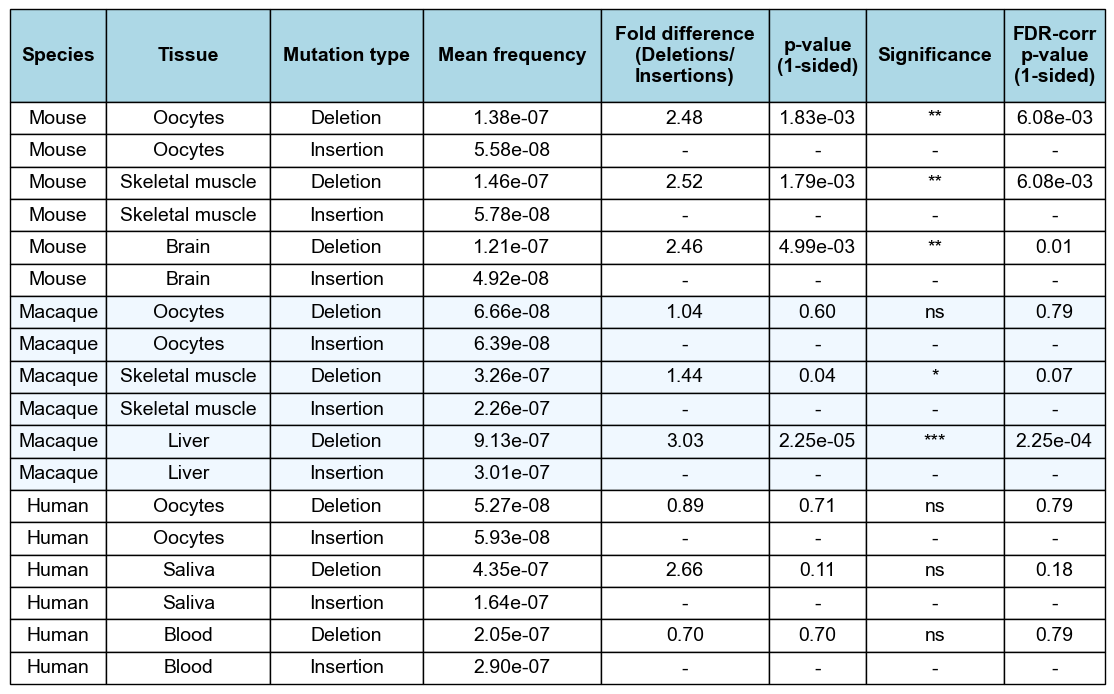

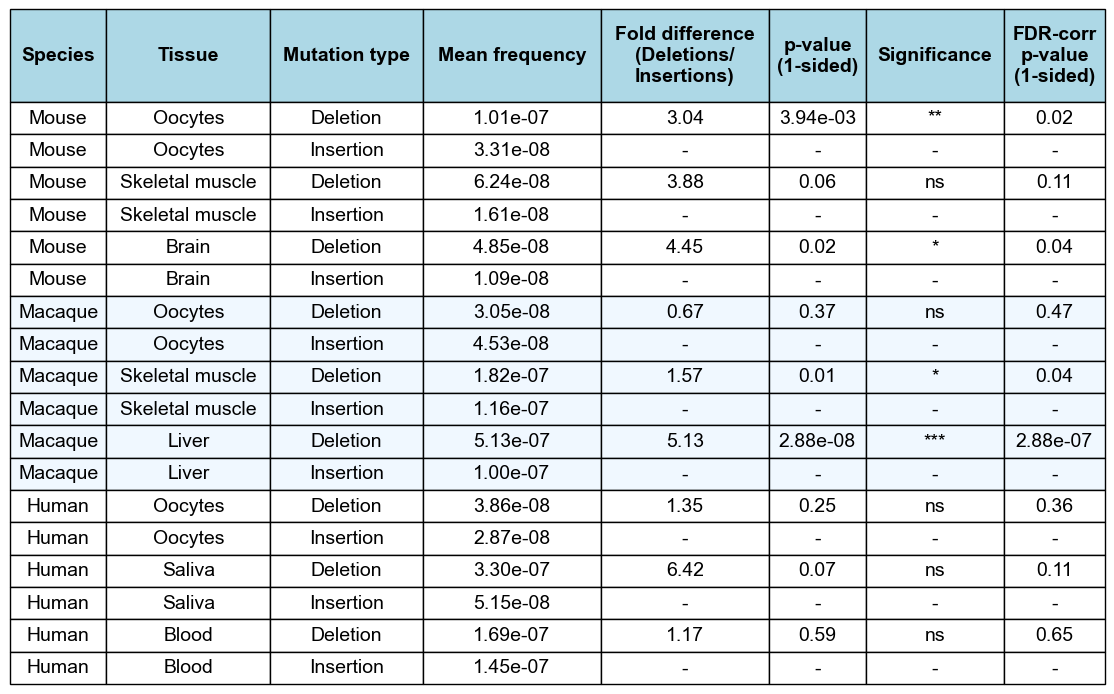

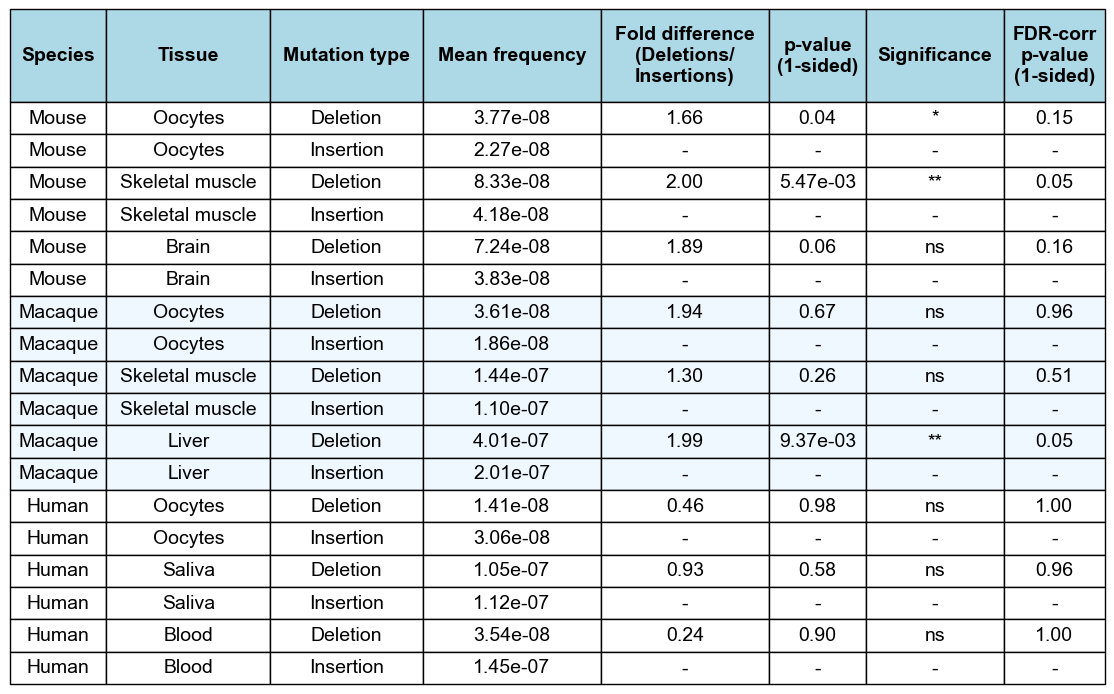

In [ ]:
import matplotlib.pyplot as plt
# from pandas.plotting import table
import textwrap

# Set the default font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'



def enforce_line_breaks_in_headers(df, max_width=20):
    """
    Enforces line breaks in column headers by inserting `\n` when the text exceeds `max_width`.
    """
    # Replace spaces with newlines if the text length exceeds max_width
    df.columns = [
        '\n'.join(textwrap.wrap(col, max_width)) if len(col) > max_width else col
        for col in df.columns
    ]
    return df


def format_nucleotides_column(df):
    """
    Format the 'Nucleotides sequenced' column to display as an integer with commas.
    If the column contains commas, they are removed before conversion.
    Handles both float and integer values.
    """
    if 'Nucleotides sequenced' in df.columns:
        df['Nucleotides sequenced'] = df['Nucleotides sequenced'].apply(
            lambda x: f"{int(float(str(x).replace(',', '').replace(' ', '').replace('$', ''))):,}" if pd.notnull(x) else ""
        )
    if 'Fold difference (Older/Younger)' in df.columns:
        df['Fold difference (Older/Younger)'] = df['Fold difference (Older/Younger)'].astype(float).apply(lambda x: f"{x:,.{1}f}")
        df['Fold difference (Older/Younger)'] = df['Fold difference (Older/Younger)'].replace({'nan':'N/A','inf':'N/A'})
    return df


def format_long_numbers(df, precision=3):
    """
    Format numbers in the dataframe:
    - Large numbers are formatted with commas (e.g., 1,000,000).
    - Floats smaller than 1 are displayed in scientific notation.
    - Precision for floats is controlled by the 'precision' parameter.
    """
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = df[col].apply(lambda x: f"{x:,.{precision}f}" if x >= 0.01 else f"{x:.{precision}e}")
    return df


def replace_tandem_appearances(df_in, index_col='Tissue'):
    df = df_in.copy()
    for col in [ index_col ]:
        if isinstance(df[col].dtype, pd.CategoricalDtype):
            # Add an empty string as a valid category
            df[col] = df[col].cat.add_categories([""])
        # Replace tandem appearances with an empty string
        df[col] = df[col].where(df[col].ne(df[col].shift()), "")
    # Columns to conditionally clear based on the index col
    columns_to_clear = [
        'Fold difference means',
        # 'Fold difference medians', 
        'p-value (1-sided)', 
        'Significance', 
        'FDR-corr p-value (1-sided)'
    ]
    # Clear values in specified columns where the index col is empty
    df[columns_to_clear] = df[columns_to_clear].where(df[index_col] != "", "-")
    # Add back the Tissue values.
    df[index_col] = df_in[index_col]
    return df


def export_table_as_png(df, file_prefix="table_custom_header.png", save=True):
    df = df.copy()

    # Replace values.
    df = df.rename(columns={'Mutation_type':'Mutation type'})

    # Format long numbers
    df = format_long_numbers(df, precision=2)

    # Apply custom formatting for 'Nucleotides sequenced' column
    df = format_nucleotides_column(df)

    # Replace tandem appearances of the specified column with an empty string
    df = replace_tandem_appearances(df)

    # Replace values.
    df = df.rename(columns={'Fold difference means':'Fold difference (Deletions/ Insertions)'})
    # Drop columns.
    df = df.drop(['Fold difference medians','Median frequency'], axis=1)

    # Enforce line breaks in column headers
    df = enforce_line_breaks_in_headers(df, max_width=15)

    # Set the font to Arial and size to 10
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 10

    # Create the figure for the table
    plt.figure(figsize=(10, 6))  # Adjust size as needed

    # Create a table using pandas' built-in functionality
    ax = plt.gca()
    ax.axis('off')  # Turn off axes
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=['lightgrey']*len(df.columns))

    # Adjust column width.
    table.auto_set_column_width(col=list(range(len(df.columns))))

    # Scale the table (header and row scaling) and paint cells
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # Header row
            cell.set_fontsize(14)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('lightblue')  # Optional: Set header row color
            cell.set_height(0.2)  # Increase the height of the header rows
        else:  # Data rows
            cell.set_fontsize(14)
            cell.set_height(0.07)  # Increase the height of the header rows
            cell.set_facecolor('white')  # Optional: Set data row color
            
            if df[df['Species']=='Macaque'].shape[0] > 1:
                if df.iloc[i-1]["Species"] == "Macaque":
                    # Paint the entire row
                    cell.set_facecolor('#F0F8FF')
            else:
                # Check the value in the relevant columns for each cell
                if df.iloc[i-1]["Species"] != "":  # If "Species" has a value
                    # Paint the entire row
                    cell.set_facecolor('#F0F8FF')
                elif df.iloc[i-1]["Tissue"] != "":  # If "Tissue" has a value
                    # Paint everything except the "Species" column
                    if j != df.columns.get_loc("Species"):  # Exclude "Species" column
                        cell.set_facecolor('#F0F8FF')  # Set light gray for non-empty "Tissue"
                elif df.iloc[i-1]["Mutation type"] != "":  # If "Tissue" has a value
                    # Paint everything except the "Species" column
                    if j != df.columns.get_loc("Species") and j != df.columns.get_loc("Tissue"):  # Exclude "Species" and "Tissue" column
                        cell.set_facecolor('#F0F8FF')  # Set light gray for non-empty "Tissue"

    if save:
        # Save table as tsv.
        df.to_csv( f'plots/tsv/{file_prefix}.tsv', index=None, sep='\t' )
        # Save the figure as a vectorized image.
        plt.savefig(f'plots/png/{file_prefix}.png', dpi=300, bbox_inches='tight')
        plt.savefig(f'plots/pdf/{file_prefix}.pdf', dpi=300, bbox_inches='tight')
        # plt.close()


export_table_as_png( table_a, 'tableS3_Dels_vs_Ins_including')
export_table_as_png( table_b, 'tableS3xx_Dels_vs_Ins_excluding')
export_table_as_png( table_c, 'tableS3xx_Dels_vs_Ins_only')
